### Importing Required Libraries

- `os`: Provides functionalities for interacting with the operating system, such as file handling.
- `numpy`: A powerful library for numerical computations, particularly for handling arrays.
- `matplotlib.pyplot`: A visualization library used to plot graphs and images.

### Importing TensorFlow and Keras

- `tensorflow`: A popular deep learning framework.
- `keras`: A high-level API for building and training neural networks, included in TensorFlow.

### Importing Specific Keras Modules

- `backend (K)`: Provides low-level tensor operations.
- `losses`: Contains various loss functions used for training models.
- `optimizers`: Includes different optimization algorithms like Adam, SGD, etc.
- `layers`: Used to define neural network layers.
- `models`: Helps in creating and managing neural network architectures.
- `utils`: Includes helper functions for model manipulation.
- `callbacks`: Provides mechanisms to control model training, such as early stopping.

### Importing Path from pathlib

- `Path`: A convenient way to work with file paths, making file handling more robust.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras import backend as K, losses, optimizers, layers, models, utils, callbacks

from pathlib import Path

## Import Data

### Loading the Dataset for Bone Break Classification

#### Defining the Data Directory
- `data_dir = "Bone Break Classification"`: Specifies the directory containing the dataset.

#### Loading the Training Data
- `utils.image_dataset_from_directory()`: A Keras utility function that loads images from a directory and converts them into a TensorFlow dataset.
- `labels="inferred"`: Automatically assigns labels based on folder names.
- `label_mode="int"`: Labels are assigned as integer values.
- `validation_split=0.1`: Reserves 10% of the dataset for validation.
- `subset="training"`: Loads only the training data.
- `shuffle=True`: Randomly shuffles the dataset to improve training performance.
- `color_mode="rgb"`: Loads images in RGB format.
- `image_size=(256,256)`: Resizes images to 256x256 pixels.
- `batch_size=64`: Loads images in batches of 64 to optimize performance.
- `seed=40`: Ensures consistent shuffling for reproducibility.

#### Loading the Validation Data
- Similar to training data, but with `subset="validation"`, meaning it loads the validation set.
- `seed=42`: A different seed to ensure reproducibility for validation set selection.


In [5]:
data_dir = "Bone Break Classification"

# load the train data

train_data = utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40
)


Found 1130 files belonging to 10 classes.
Using 1017 files for training.


In [6]:
#load the test data
validation_data = utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=42
)

Found 1130 files belonging to 10 classes.
Using 113 files for validation.


In [7]:
# Inspect class names
class_names = train_data.class_names
print("Class names:", class_names)

Class names: ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


### Data Preprocessing for Bone Break Classification

#### Preprocessing Function
- `def preprocess(img)`: A function to normalize image pixel values.
- `img = tf.cast(img, "float32") / 255.0`: Converts the image to a float32 tensor and scales pixel values between 0 and 1 (normalization).

#### Applying Preprocessing to Training and Validation Data
- `train_dataset = train_data.map(lambda x, y: (preprocess(x), y))`: Maps the preprocessing function to all training images.
- `val_dataset = validation_data.map(lambda x, y: (preprocess(x), y))`: Maps the preprocessing function to validation images.

#### Extracting Training Data and Labels
- `x_train = []`: List to store preprocessed training images.
- `y_train = []`: List to store corresponding labels.

#### Iterating Over the Dataset
- `for images, labels in train_dataset:`: Loops through each batch of images and labels in the dataset.
- `x_train.append(images.numpy())`: Converts images to NumPy arrays and appends them.
- `y_train.append(labels.numpy())`: Converts labels to NumPy arrays and appends them.

#### Combining All Batches into a Single Array
- `x_train = np.concatenate(x_train, axis=0)`: Merges all image batches into one NumPy array.
- `y_train = np.concatenate(y_train, axis=0)`: Merges all label batches into one NumPy array.

This process ensures that the training data is properly preprocessed and structured for model training.


In [9]:
# data preprocessing
def preprocess(img):
    img = tf.cast(img, "float32") / 255.0
    return img

train_dataset = train_data.map(lambda x, y: (preprocess(x), y))
val_dataset = validation_data.map(lambda x, y: (preprocess(x), y))

In [10]:
# get train data and labels
x_train = []
y_train = []

for images, labels in train_dataset:
    #append train data to x_train
    x_train.append(images.numpy())
    
    #append labels to y_train
    y_train.append(labels.numpy())
    
# concatenate all the batches to get the full list
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [11]:
# get val data and labels

x_val = []
y_val = []

for images, labels in val_dataset:
    #append train data to x_train
    x_val.append(images.numpy())
    
    #append labels to y_train
    y_val.append(labels.numpy())
    
# concatenate all the batches to get the full list
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [12]:
class_names_dict = {
    0: 'Avulsion fracture', 
    1: 'Comminuted fracture', 
    2: 'Fracture Dislocation',
    3: 'Greenstick fracture',
    4: 'Hairline Fracture',
    5: 'Impacted fracture',
    6: 'Longitudinal fracture',
    7: 'Oblique fracture',
    8: 'Pathological fracture',
    9: 'Spiral Fracture'
}

### Function to Display Images

#### Purpose:
The `display()` function is used to visualize a subset of images from the dataset along with their corresponding labels.

#### Parameters:
- `images`: The dataset containing image samples.
- `n=12`: Number of images to display (default is 12).
- `size=(15,5)`: Figure size for better visualization.
- `cmap="gray_r"`: Colormap used for grayscale images (`gray_r` shows reversed grayscale).
- `as_type="float32"`: Specifies the datatype to convert the images before displaying.

#### Steps:
1. **Randomly Select Images**  
   - `indices = np.random.choice(len(images), n)`: Picks `n` random indices from the dataset.

2. **Determine Grid Layout**  
   - `num_images_per_row = 4`: Defines the number of images per row.
   - `num_rows = (n + num_images_per_row - 1) // num_images_per_row`: Computes the required number of rows.

3. **Set Up the Subplots**  
   - `fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=size)`: Creates a grid of subplots.

4. **Display Each Image**  
   - Iterates through selected indices and assigns each image to a subplot.
   - Retrieves the corresponding class label from `y_train`.
   - Uses `class_names_dict.get(label_index, f'Unknown Class {label_index}')` to map label indices to class names.
   - Assigns the correct position `(row, col)` in the grid.
   - `axes[row, col].imshow(images[index].astype(as_type), cmap=cmap)`: Converts and displays the image.
   - `axes[row, col].set_title(f'Class: {label_index}')`: Sets the title with the class label.
   - `axes[row, col].axis('off')`: Hides axis lines.

5. **Adjust Spacing & Display**  
   - `plt.subplots_adjust(wspace=0.5, hspace=0.5)`: Adds spacing between images.
   - `plt.show()`: Displays the images.

This function is useful for visualizing how the dataset looks before training a model.


In [14]:
# function to display images

def display(images, n=12, size=(15,5), cmap="gray_r", as_type="float32"):
    indices = np.random.choice(len(images), n)
    
    num_images_per_row = 4
    
    num_rows = (n + num_images_per_row - 1) // num_images_per_row
    
    # Set up the subplots
    fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=size)

    #plt.figure(figsize=size)
    for i, index in enumerate(indices):
        #plt.subplot(1, n, i+1)
        
        label_index = y_train[index]
    
        # Convert integer label to class name
        class_name = class_names_dict.get(label_index, f'Unknown Class {label_index}')
    
          # Calculate the position of the subplot in the grid
        row = i // num_images_per_row
        col = i % num_images_per_row
    
        axes[row, col].imshow(images[index].astype(as_type), cmap=cmap)
        axes[row, col].set_title(f'Class: {label_index}')
        axes[row, col].axis('off')
        
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    plt.show()

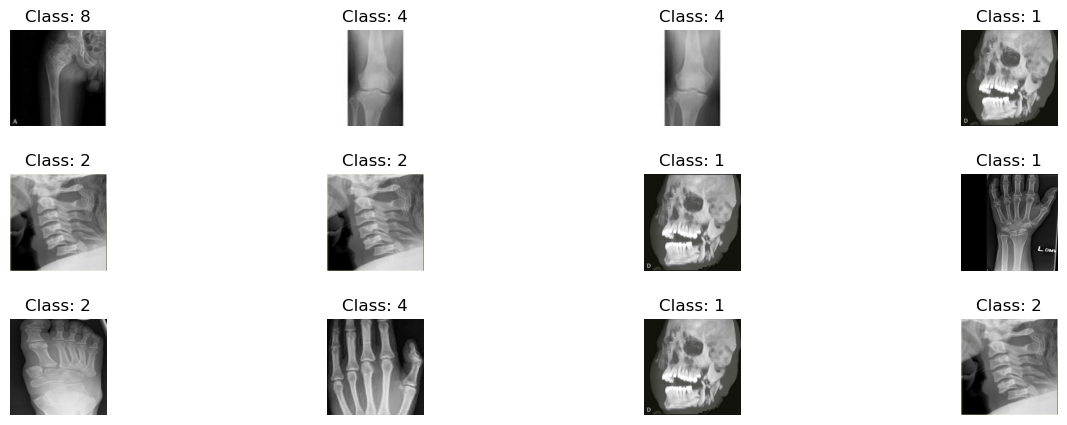

In [15]:
# display sample train images

sample_images = x_train[:10]

display(sample_images)

In [16]:
# view tensor shape

x_train.shape

(1017, 256, 256, 3)

In [17]:
# one-hot encode the train, val data

NUM_CLASSES = len(class_names)

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_val = utils.to_categorical(y_val, NUM_CLASSES)


## CNN

### Building the CNN Model for Bone Break Classification

#### Input Layer
- `input_layer = layers.Input(shape=(256,256,3))`: Defines the input shape (256x256 RGB images).

#### Convolutional and Processing Layers
Each convolutional block consists of:
1. **Conv2D Layer**: Applies a 2D convolution with:
   - `filters=32, 64, 128, 256`: Increasing the number of filters as depth increases.
   - `kernel_size=(3,3)`: Uses a 3x3 kernel for feature extraction.
   - `strides=2`: Downsamples the image after each convolution.
   - `padding="same"`: Ensures output dimensions remain consistent.

2. **Batch Normalization**: Normalizes activations for stable training.

3. **LeakyReLU Activation**: Introduces non-linearity with a slight negative slope (`alpha=0.2`).

4. **Dropout (rate=0.2)**: Reduces overfitting by randomly deactivating neurons during training.

#### Fully Connected Layers
- `Flatten()`: Converts feature maps into a 1D vector.
- `Dense(units=100)`: Fully connected layer with 100 neurons.
- `Batch Normalization`, `LeakyReLU`, and `Dropout` (same as previous layers).

#### Output Layer
- `Dense(units=10, activation="softmax")`: Produces a probability distribution over 10 classes.

#### Model Definition
- `model1 = models.Model(input_layer, output_layer)`: Defines the model.
- `model1.summary()`: Prints the model architecture.

This architecture extracts hierarchical image features and classifies them into 10 categories using a softmax activation.


In [20]:
input_layer = layers.Input(shape=(256,256, 3))

x = layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=2,
    padding="same"
)(input_layer)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    64,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    128,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    256,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Flatten()(x)

x = layers.Dense(units=100)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

output_layer = layers.Dense(units=10, activation="softmax")(x)

model1 = models.Model(input_layer, output_layer)

model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     6,553,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,945,446 (26.49 MB)

 Trainable params: 6,944,286 (26.49 MB)

 Non-trainable params: 1,160 (4.53 KB)

In [21]:
opt = optimizers.Adam(learning_rate=0.0005)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [22]:
# save checkpoints to monitor best performing models

model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="./Cnn_Bone_Break_Classification.keras",
    save_weights_only = False,
    save_freq = "epoch",
    monitor = "loss",
    mode = "min",
    save_best_only = True,
    verbose = 0
)

tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")

In [23]:
history = model1.fit(
    x_train,
    y_train,
    shuffle=True,
    batch_size=32,
    epochs=10,
    validation_data=(x_val, y_val),
    callbacks=[
        model_checkpoint_callback,
        tensorboard_callback,
    ]
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 991ms/step - accuracy: 0.1737 - loss: 2.7918 - val_accuracy: 0.1593 - val_loss: 2.2835
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 554ms/step - accuracy: 0.3027 - loss: 2.0265 - val_accuracy: 0.2832 - val_loss: 1.9858
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 463ms/step - accuracy: 0.4085 - loss: 1.7300 - val_accuracy: 0.4690 - val_loss: 1.6466
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 474ms/step - accuracy: 0.6208 - loss: 1.2306 - val_accuracy: 0.7434 - val_loss: 1.0060
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 467ms/step - accuracy: 0.8081 - loss: 0.7258 - val_accuracy: 0.8496 - val_loss: 0.6650
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step - accuracy: 0.9173 - loss: 0.4549 - val_accuracy: 0.9292 - val_loss: 0.4056
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - accuracy: 0.9634 - loss: 0.2639 - val_accuracy: 0.9381 - val_loss: 0.2828
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 479ms/step - accuracy: 0.9856 - loss: 0.1731 - val_accu

In [24]:
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["accuracy"]

In [25]:
model1.evaluate(x_val, y_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9486 - loss: 0.2209


[0.23075053095817566, 0.9469026327133179]

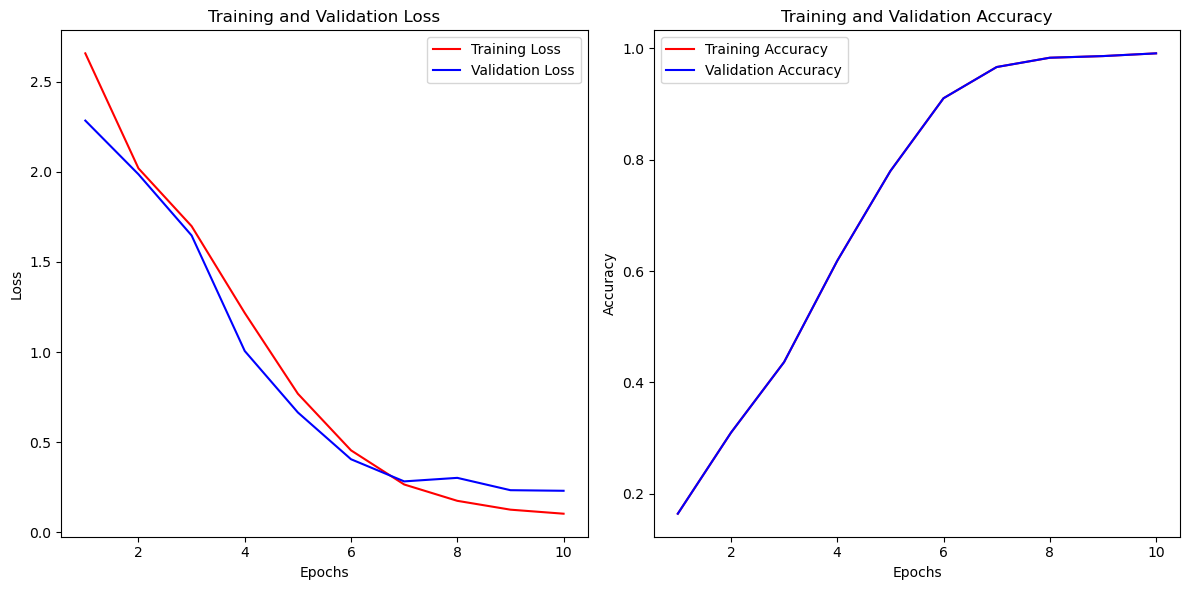

In [26]:
# plot learning curve

epochs= range(1,11)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss, 'r-', label="Training Loss")
plt.plot(epochs, val_loss, 'b-', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_accuracy, 'r-', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b-', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
#predictions

preds = model1.predict(x_val)
CLASSES = np.array(class_names)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [28]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_val, axis=-1)]

In [29]:
preds_single

array(['Longitudinal fracture', 'Fracture Dislocation',
       'Longitudinal fracture', 'Longitudinal fracture',
       'Spiral Fracture', 'Pathological fracture', 'Comminuted fracture',
       'Comminuted fracture', 'Hairline Fracture', 'Fracture Dislocation',
       'Greenstick fracture', 'Greenstick fracture',
       'Comminuted fracture', 'Pathological fracture',
       'Pathological fracture', 'Pathological fracture',
       'Spiral Fracture', 'Avulsion fracture', 'Impacted fracture',
       'Avulsion fracture', 'Spiral Fracture', 'Hairline Fracture',
       'Longitudinal fracture', 'Longitudinal fracture',
       'Fracture Dislocation', 'Avulsion fracture', 'Avulsion fracture',
       'Oblique fracture', 'Oblique fracture', 'Fracture Dislocation',
       'Greenstick fracture', 'Avulsion fracture', 'Avulsion fracture',
       'Impacted fracture', 'Fracture Dislocation',
       'Fracture Dislocation', 'Comminuted fracture',
       'Greenstick fracture', 'Pathological fracture',
   

In [30]:
model1.save("Bone_Classification.keras")

Classification Report:
                       precision    recall  f1-score   support

    Avulsion fracture       0.85      1.00      0.92        11
  Comminuted fracture       1.00      0.87      0.93        15
 Fracture Dislocation       1.00      1.00      1.00        17
  Greenstick fracture       0.83      1.00      0.91        10
    Hairline Fracture       1.00      1.00      1.00        11
    Impacted fracture       1.00      0.88      0.93         8
Longitudinal fracture       1.00      0.92      0.96        12
     Oblique fracture       1.00      0.90      0.95        10
Pathological fracture       0.92      1.00      0.96        12
      Spiral Fracture       0.86      0.86      0.86         7

             accuracy                           0.95       113
            macro avg       0.95      0.94      0.94       113
         weighted avg       0.95      0.95      0.95       113



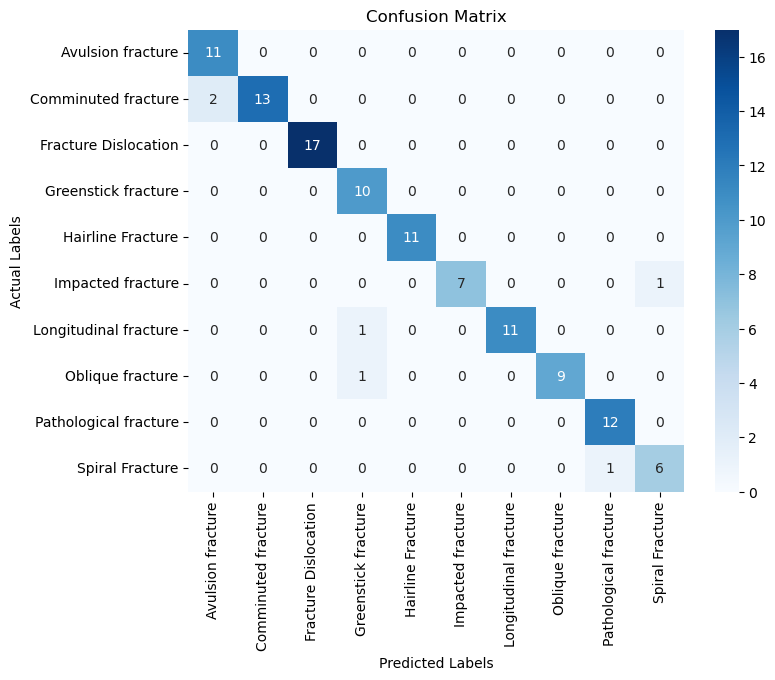

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(actual_single, preds_single)

# Print the classification report
print("Classification Report:")
print(classification_report(actual_single, preds_single, target_names=CLASSES))

# Visualizing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()
